In [5]:
import sys,os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt

from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# 這邊會用兩種回歸方法修正參數，原本的微分 / 誤差修正法兩種
(x_train,t_train),(x_test,t_test) = load_mnist(normalize=True,one_hot_label=True)
network = TwoLayerNet(input_size=784,hidden_size=50,output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size/batch_size,1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 選擇迭代方法 numerical_gradient 才是原本的方法
    grad = network.gradient(x_batch,t_batch)
#     grad = network.numerical_gradient(x_batch,t_batch)
    
    for key in ('W1','b1','W2','b2'):
        network.params[key] -= learning_rate*grad[key]
    
    loss = network.loss(x_batch,t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch ==0:
        train_acc = network.accuracy(x_train,t_train)
        test_acc = network.accuracy(x_test,t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(("train acc, test acc | ") + str(train_acc)+'+'+str(test_acc))

#------------以下為繪圖需求，轉一維
markers = {'train':'o','test':'s'}



train acc, test acc | 0.09751666666666667+0.0974
train acc, test acc | 0.7967+0.8018
train acc, test acc | 0.8785333333333334+0.8849
train acc, test acc | 0.8994166666666666+0.9023
train acc, test acc | 0.90845+0.912
train acc, test acc | 0.91425+0.9162
train acc, test acc | 0.9196+0.9219
train acc, test acc | 0.9229833333333334+0.9252
train acc, test acc | 0.9266666666666666+0.9283
train acc, test acc | 0.9303333333333333+0.9323
train acc, test acc | 0.9332333333333334+0.9359
train acc, test acc | 0.9359+0.9378
train acc, test acc | 0.9381666666666667+0.9379
train acc, test acc | 0.94005+0.9403
train acc, test acc | 0.9426166666666667+0.9415
train acc, test acc | 0.9448666666666666+0.9429
train acc, test acc | 0.9465833333333333+0.9456


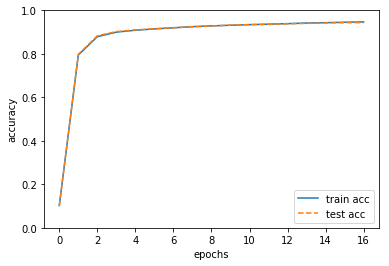

In [3]:
x = np.arange(len(train_acc_list)) # 橫軸 = 成功數
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

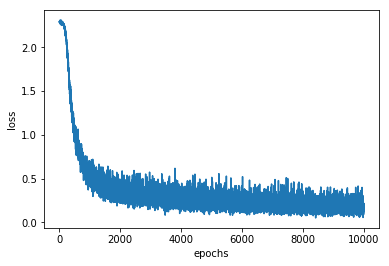

In [7]:
x = np.arange(len(train_loss_list))
plt.plot(x,train_loss_list, label='train_loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()